In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

In [53]:
flows = pd.read_csv("../data/inflows of foreign population by nationality.csv", low_memory=False)

flows = flows.dropna(subset=['Value'])
flows_cleaned = flows.dropna(subset=['Value'])

# dropping columns that we don't need
flows_cleaned = flows.drop(columns=['Flag Codes', 'Flags'])

In [54]:
flows_cleaned = flows_cleaned[flows_cleaned['Country of birth/nationality'] == "Total"]

In [55]:
flows_cleaned['Variable'].unique()

array(['Inflows of foreign population by nationality',
       'Outflows of foreign population by nationality',
       'Stock of foreign-born population by country of birth',
       'Stock of foreign population by nationality',
       'Acquisition of nationality by country of former nationality'],
      dtype=object)

In [56]:
flows_cleaned = flows_cleaned[(flows_cleaned['Variable'] == 'Inflows of foreign population by nationality') | (flows_cleaned['Variable'] == 'Outflows of foreign population by nationality')]

In [57]:
flows_cleaned['Country'].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Czechia', 'Denmark',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'Ireland', 'Italy', 'Japan', 'Korea', 'Luxembourg', 'Mexico',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Slovak Republic', 'Spain', 'Sweden', 'Switzerland', 'Türkiye',
       'United Kingdom', 'United States', 'Chile', 'Estonia', 'Israel',
       'Slovenia', 'Latvia'], dtype=object)

In [58]:
flows_cleaned.head()

,CO2,Country of birth/nationality,VAR,Variable,GEN,Gender,COU,Country,YEA,Year,Value
190304,TOT,Total,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2000,2000,107148.0
190305,TOT,Total,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2001,2001,127877.0
190306,TOT,Total,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2002,2002,119080.0
190307,TOT,Total,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2003,2003,123411.0
190308,TOT,Total,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2004,2004,146441.0


In [59]:
flows_cleaned = flows_cleaned[['Country', 'Year', 'Variable', 'Value']]

In [60]:
schengen_countries = ['Germany', 'France', 'Greece', 'Spain', 'Italy']
non_schengen = ['Australia', 'Canada', 'Japan', 'New Zealand', 'United States']
schengen_non = flows_cleaned[flows_cleaned['Country'].isin(schengen_countries + non_schengen)]

In [61]:
def is_schengen(country):
    if country in schengen_countries:
        return 'Schengen'
    else:
        return 'Non_Schengen'

In [62]:
schengen_non = schengen_non.copy()
schengen_non.loc[:, 'Schengen'] = schengen_non['Country'].apply(is_schengen)


/var/folders/pq/qfw7ttdx6js3zt8l7f7hpvtm0000gn/T/ipykernel_56522/3238145864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  schengen_non['Schengen'] = schengen_non['Country'].apply(lambda x: is_schengen(x))


In [64]:
schengen_non['Variable'].unique()

array(['Inflows of foreign population by nationality',
       'Outflows of foreign population by nationality'], dtype=object)

In [65]:
# Filter the DataFrame to include only the rows where the variable is 'Inflows of foreign population by nationality'
inflows_df = schengen_non[schengen_non['Variable'] == 'Inflows of foreign population by nationality']
outflows_df = schengen_non[schengen_non['Variable'] == 'Outflows of foreign population by nationality']

# Group the data by the 'Schengen' column and calculate the total migration flow for each group
migration_comparison = inflows_df.groupby('Schengen')['Value'].sum()

print(migration_comparison)

Schengen
Non_Schengen    41755180.0
Schengen        42897652.0
Name: Value, dtype: float64


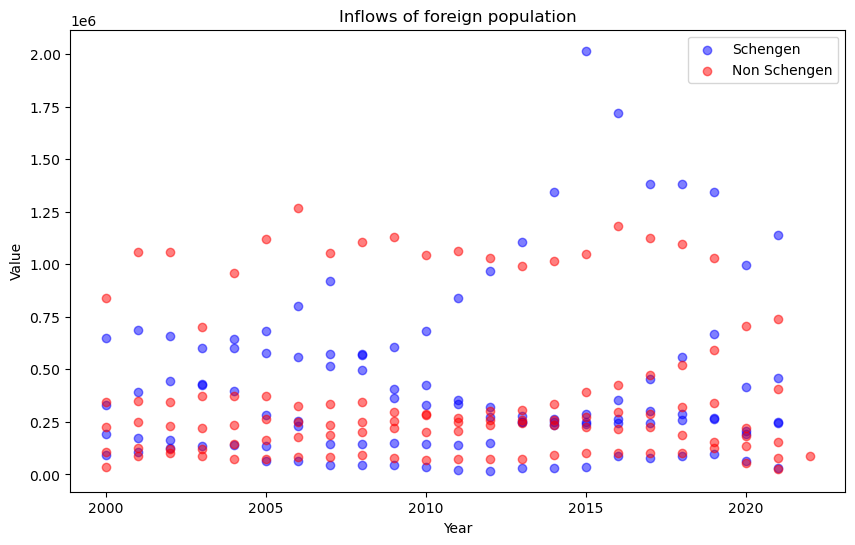

In [70]:
# emigrating population
fig, ax = plt.subplots(figsize=(10, 6))

colors = ['b' if s == 'Schengen' else 'r' for s in inflows_df['Schengen']]

# Create separate scatter plots for each color
schengen = ax.scatter(inflows_df.loc[inflows_df['Schengen'] == 'Schengen', 'Year'],
                      inflows_df.loc[inflows_df['Schengen'] == 'Schengen', 'Value'],
                      c='b', alpha=0.5, label='Schengen')

non_schengen = ax.scatter(inflows_df.loc[inflows_df['Schengen'] == 'Non_Schengen', 'Year'],
                          inflows_df.loc[inflows_df['Schengen'] == 'Non_Schengen', 'Value'],
                          c='r', alpha=0.5, label='Non Schengen')

# Add legend
ax.legend(handles=[schengen, non_schengen])

ax.set_xlabel('Year')
ax.set_ylabel('Value')
ax.set_title('Inflows of foreign population')

plt.show()

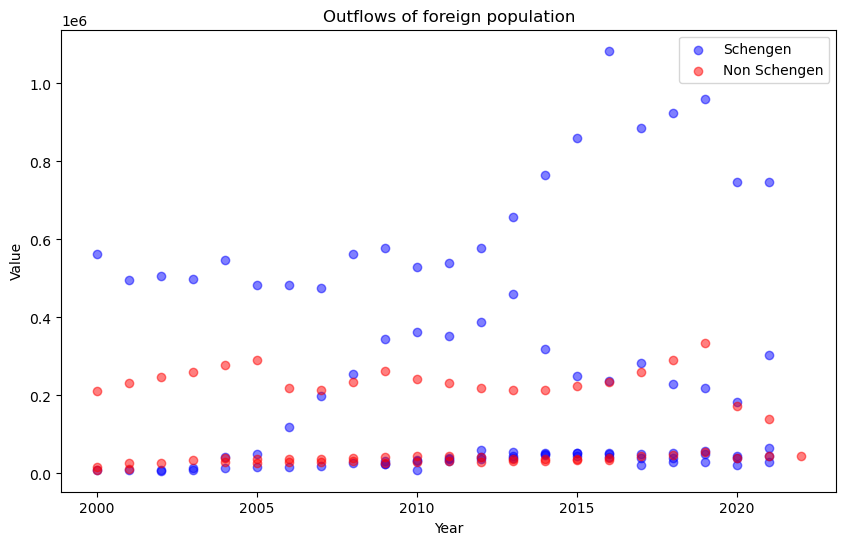

In [69]:
# foreign_population leaving
fig, ax = plt.subplots(figsize=(10, 6))

colors = ['b' if s == 'Schengen' else 'r' for s in outflows_df['Schengen']]

# Create separate scatter plots for each color
schengen = ax.scatter(outflows_df.loc[outflows_df['Schengen'] == 'Schengen', 'Year'],
                      outflows_df.loc[outflows_df['Schengen'] == 'Schengen', 'Value'],
                      c='b', alpha=0.5, label='Schengen')

non_schengen = ax.scatter(outflows_df.loc[outflows_df['Schengen'] == 'Non_Schengen', 'Year'],
                          outflows_df.loc[outflows_df['Schengen'] == 'Non_Schengen', 'Value'],
                          c='r', alpha=0.5, label='Non Schengen')

# Add legend
ax.legend(handles=[schengen, non_schengen])

ax.set_xlabel('Year')
ax.set_ylabel('Value')
ax.set_title('Outflows of foreign population')

plt.show()